# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

## Data Exploration

In [2]:
# Retrieving info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
# Reviewing how the data is structured
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Review of descriptive statistics of the data
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


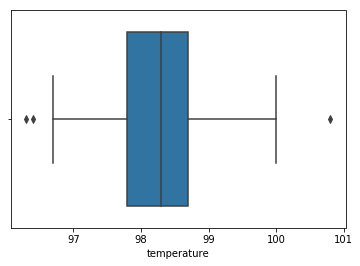

In [5]:
# Visualizing distribution of temperatures through quantiles
sns.boxplot("temperature", data=df)

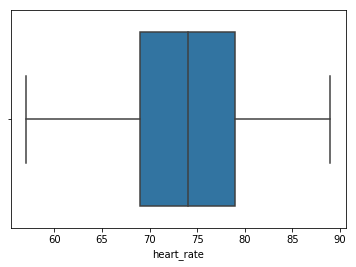

In [6]:
# Visualizing distribution of heart rate through quantiles
sns.boxplot("heart_rate", data=df)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


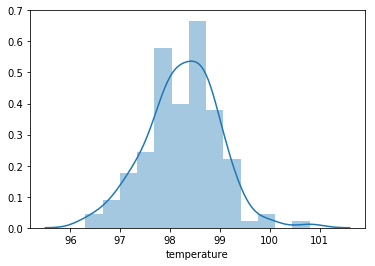

In [7]:
# Visualizing histogram of temperatures
sns.distplot(df.temperature)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


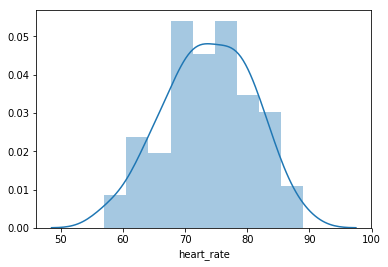

In [8]:
# Visualizing histogram of heart rate
sns.distplot(df.heart_rate)

## 1. Is the distribution of body temperatures normal?

Per visualizations above, temperature distribution seems to be normal but outliers were idenfied. 
68–95–99.7 rule analisis will follow to be sure distribution is normal

In [9]:
temp_sample_mean = np.mean(df.temperature)
temp_sample_std = np.std(df.temperature)

In [10]:
temp_sample_max = np.max(df.temperature)
temp_sample_min = np.min(df.temperature)

In [11]:
# Calculation of how many standard deviations are the maximum and minimum values of the sample
(temp_sample_max - temp_sample_mean) / temp_sample_std

3.4924927267747696

In [12]:
(temp_sample_mean - temp_sample_min) / temp_sample_std

2.6688711006174173

Maximum value is 3.49 stds away from sample mean. For a sample of 130 is a rare event having a value over 3 stds away but it is possible.
Minumum value is less than 3 stds away and for a sample of 130 is expected

### 68–95–99.7 rule

In [13]:
# Percentage of values within 1 std of sample mean
df.temperature[(df.temperature < temp_sample_mean + temp_sample_std) & 
               (df.temperature > temp_sample_mean - temp_sample_std)].count() / len(df.temperature)

0.6923076923076923

In [14]:
# Percentage of values within 2 std of sample mean
df.temperature[(df.temperature < temp_sample_mean + 2 * temp_sample_std) & 
               (df.temperature > temp_sample_mean - 2 * temp_sample_std)].count() / len(df.temperature)

0.9461538461538461

In [15]:
# Percentage of values within 3 std of sample mean
df.temperature[(df.temperature < temp_sample_mean + 3 * temp_sample_std) & 
               (df.temperature > temp_sample_mean - 3 * temp_sample_std)].count() / len(df.temperature)

0.9923076923076923

Percentages of values within 1, 2 and 3 stds are very close to the 68-95-99.7 rule and we can conclude distribution is normal

## 2. Is the sample size large? Are the observations independent?

The sample size has more than 30 values and it can be considered large enough per CLT.
Observations are independent. They were sampled without replacement but are less than 10% of the population

## 3 Is the true population mean really 98.6 degrees F?

### H0 = Population mean is 98.6 degrees F
### H1 = Population mean is different than 98.6 degrees F

### Bootstrap hypothesis test.

In [16]:
population_mean = 98.6

In [17]:
def draw_bs_replicates(shifted_data, size=1000):
    '''Draw bootstrap replicates'''
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = np.mean(np.random.choice(shifted_data, len(shifted_data)))
        
    return bs_replicates

In [18]:
def bootstrap_prob(data, population_mean):
    '''Estimates p-value with bootstrap methodology'''
    
    mean_sample = np.mean(data)
    
    shifted_data = df.temperature - temp_sample_mean + population_mean
    
    bs_replicates = draw_bs_replicates(shifted_data, size=10000)
    
    if population_mean > mean_sample:
        p_value = np.sum(bs_replicates <= mean_sample) / len(bs_replicates)
    else:
        p_value = np.sum(bs_replicates >= mean_sample) / len(bs_replicates)
        
    return p_value
    

In [19]:
bootstrap_prob(df.temperature, population_mean)

0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


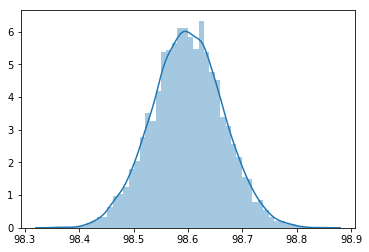

In [20]:
shifted_data = df.temperature - temp_sample_mean + population_mean
bs_reps = draw_bs_replicates(shifted_data, 10000)
sns.distplot(bs_reps)

According to the P Value, we are able to reject H0 and determine the mean temperature is not 98.6 degrees F

### Frequentist statistical testing

Frecuentist statistical testing will be done using only one sample as this case doesn't involve comparing significant difference between two samples 

In [21]:
st_error_mean = temp_sample_std / np.sqrt(len(df.temperature))

In [22]:
z_score = (population_mean - temp_sample_mean) / st_error_mean

In [23]:
# Probability of getting a value with z_score stds away from mean (2 tails)
(1 - stats.norm.cdf(z_score)) * 2 

4.352315174926957e-08

Probability is virtually 0

### In this situation, is it appropriate to use the  t  or  z  statistic?

In this situation is appropiate to use the Z statistic as the number of observations in more than 30

### Now try using the other test. How is the result be different? Why?

In [24]:
t_value = (population_mean - temp_sample_mean) / st_error_mean
deg_freedom = len(df.temperature) - 1

In [25]:
# Probability of getting a value with t_value stds away from mean (2 tails)
(1 - stats.t.cdf(t_value, df=deg_freedom)) * 2 

2.1887464640713006e-07

In this case the result is not very different as the probability is very low

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. Which one is the correct one to use?

In [26]:
temp_sample10 = np.random.choice(df.temperature, replace=False, size=10)

In [27]:
# Calculate mean and std for the sample of 10
mean_sample10 = np.mean(temp_sample10)
std_sample10 = np.std(temp_sample10)

In [28]:
st_error_sample10 = std_sample10 / np.sqrt(len(temp_sample10))

In [29]:
z_score10 = (population_mean - mean_sample10) / st_error_sample10

In [30]:
# Probability of getting a value with z_score stds away from mean (2 tails)
(1 - stats.norm.cdf(z_score10)) * 2 

0.07303901087006825

In [31]:
t_value10 = (population_mean - mean_sample10) / st_error_sample10
deg_freedom10 = len(temp_sample10) - 1

In [32]:
# Probability of getting a value with t_value stds away from mean (2 tails)
(1 - stats.t.cdf(t_value10, df=deg_freedom10)) * 2 

0.1066339746860625

In this case, the correct test to run is the T. As the sample is less than 30, the T distibution is a better estimator of the p value

The results change significantly with a sample size of 10 and we can't find a statistically significant difference with alpha of 0.05

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

### Bootstrap method

In [33]:
def draw_bs_replicates_one_draw(data, size=1000):
    '''Draw bootstrap replicates of sample size 1'''
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = np.random.choice(shifted_data)
        
    return bs_replicates

In [34]:
bs_replicates_one_draw = draw_bs_replicates_one_draw(df.temperature, size=10000)
confidence_interval_bs = np.percentile(bs_replicates_one_draw, [2.5, 97.5])
confidence_interval_bs

array([97.05076923, 99.85076923])

In [35]:
margin_of_error_bs = (confidence_interval_bs[1] - confidence_interval_bs[0])/np.mean(confidence_interval_bs)
margin_of_error_bs

0.028440610691794387

Per the bootstrap method, with 95% confidence, an abnormal temperature is higher than 99.85 or lower than 97.05 degrees F, with a margin of error of 2.84%

### Frequentist method

In [36]:
deg_freedom = len(df.temperature) - 1
t_value = stats.t.ppf(0.975, deg_freedom)

In [37]:
distance_from_mean = t_value * temp_sample_std/np.sqrt(len(df.temperature))

In [38]:
confidence_interval_freq = [temp_sample_mean - distance_from_mean, temp_sample_mean + distance_from_mean]
confidence_interval_freq

[98.12249318821641, 98.37596835024515]

In [39]:
margin_of_error_freq = distance_from_mean / temp_sample_mean
margin_of_error_freq

0.0012899600334994002

Per the frequentist method, with 95% confidence, an abnormal temperature is higher than 98.376 or lower than 98.122 degrees F, with a margin of error of 0.12%

## 6. Is there a significant difference between males and females in normal temperature?

In [40]:
male_temp = df.temperature[df.gender == "M"]
female_temp = df.temperature[df.gender == "F"]

In [41]:
male_mean = np.mean(male_temp)
male_var = np.var(male_temp)
female_mean = np.mean(female_temp)
female_var= np.var(female_temp)
print("Males mean: ", male_mean)
print("Males variance: ", male_var)
print("Females mean: ", female_mean)
print("Females variance: ", female_var)

Males mean:  98.1046153846154
Males variance:  0.4807479289940825
Females mean:  98.39384615384613
Females variance:  0.5442698224852062


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


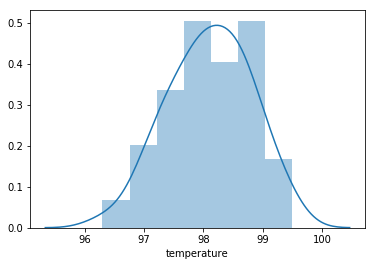

In [42]:
sns.distplot(male_temp)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


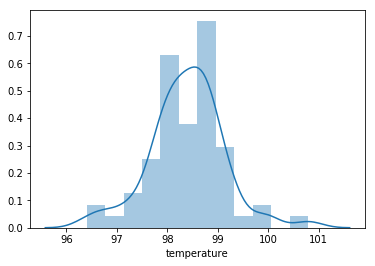

In [43]:
sns.distplot(female_temp)

# H0 = Males temperature mean is equal than female temperature mean
# H1 = Males and females temperature is not equal
### As this is a very important hypotesis the confidence level will be 99%

In [44]:
# Will substract males mean temperature from females to create a new variable and will add their variances
diff_samples_mean = female_mean - male_mean
diff_samples_var = female_var/len(female_temp) + male_var/len(male_temp)
diff_samples_std = np.sqrt(diff_samples_var)

In [45]:
diff_samples_mean

0.289230769230727

In [46]:
diff_samples_std

0.12557668521231213

In [47]:
# finding how many stds is the mean sample from the population mean
t_value_diff = diff_samples_mean / diff_samples_std
t_value_diff

2.3032202891940123

In [48]:
difference_temp_genders = 0 # Null hypotesis
deg_freedom_diff = len(male_temp) - 1 + len(female_temp) - 1
p_val_diff = (1 - stats.t.cdf(t_value_diff, df=deg_freedom_diff)) * 2 

In [49]:
p_val_diff

0.022879279869584268

In this case is the probability of getting a difference of 2.3 stds on the temperature difference between gender is 0.023 but is not enough to reject the null hypotesis

### Write a story with your conclusion in the context of the original problem

In 1886 Carl Wunderlich made observations to determine the mean temperature of the human body determining it to be 96.8 degrees F.

According to more recent observation with more scientific rigour, we were able to conclude the initial experiment perfomed by Wunderlich was biased and the conclusions were incorrect.

We were able to determine by statistical testing that the mean temperature of the human body is lower. Also, it seems likely that temperature between genders is different but we couldn't conclude it with enough confidence and more experiments with larges samples should be conducted.